# Module 3

## Video 16: Plotting with DataFrames
**Python for the Energy Industry**

In this lesson we will explore different ways of visualising data with Pandas, to start using the OPEC data,

## Plotting OPEC Data

In [1]:
import pandas as pd
import numpy as np

OPEC_df = pd.DataFrame({
    'Country': ['Algeria','Angola','Equatorial Guinea','Gabon','Iran','Iraq','Kuwait','Libya','Nigeria','Republic of the Congo','Saudi Arabia','UAE','Venezuela'],
    'Region': ['North Africa','Southern Africa','Central Africa','Central Africa','Middle East','Middle East','Middle East','North Africa','West Africa','Central Africa','Middle East','Middle East','South America'],
    'Population': [42228408,30809787,1308975,2119275,81800188,38433600,4137312,6678559,195874685,5125821,33702756,9630959,28887118],
    'Oil Production': [1348361,1769615,np.nan,210820,3990956,4451516,2923825,384686,1999885,260000,10460710,3106077,2276967],
    'Proven Reserves': [12.2e9,8.423e9,np.nan,2e9,157.53e9,143.069e9,101.5e9,48.363e9,37.07e9,1.6e9,266.578e9,97.8e9,299.953e9]
})
OPEC_df = OPEC_df.sort_values('Oil Production',ascending=False)

The .plot.bar function allows us to make a bar plot of the data, specifying which columns to put on the x and y axes:

In [2]:
OPEC_df.plot.bar(x='Country',y='Oil Production')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

We can also plot multiple columns in one bar plot by passing a list of column names. Here we plot oil production against proven reserves (using 60 * annual production to facilitate comparison).

<AxesSubplot:xlabel='Country'>

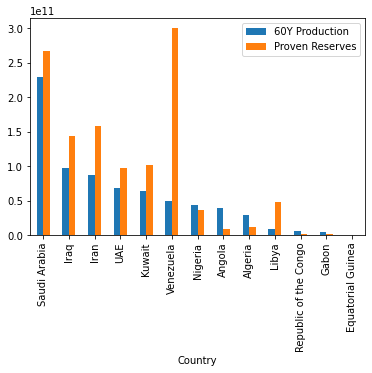

In [3]:
OPEC_df['60Y Production'] = OPEC_df['Oil Production'] * 365 * 60
OPEC_df.plot.bar(x='Country',y=['60Y Production','Proven Reserves'])

Another way of comparing these two values is with a scatter plot:

<AxesSubplot:xlabel='Oil Production', ylabel='Proven Reserves'>

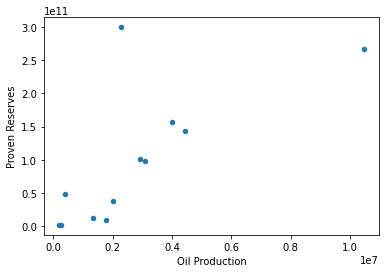

In [4]:
OPEC_df.plot.scatter(x='Oil Production',y='Proven Reserves')

We can add another layer of information to this plot by adding a new column to specify the size of data points, which is proportional to the Population.

<AxesSubplot:xlabel='Oil Production', ylabel='Proven Reserves'>

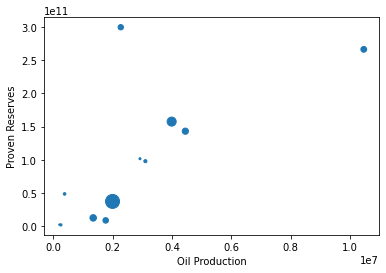

In [5]:
OPEC_df['Pop Scaled'] = OPEC_df['Population'] / 1e6
OPEC_df.plot.scatter(x='Oil Production',y='Proven Reserves',s='Pop Scaled')

Pie charts are another way of representing our data. To make the plot easier to read, we group by region.

<AxesSubplot:ylabel='Oil Production'>

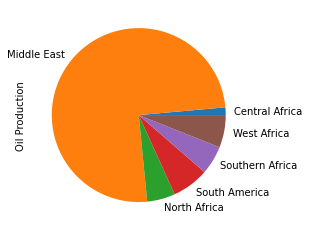

In [6]:
OPEC_df.groupby('Region').sum().plot.pie(y='Oil Production',legend=False)

## Plotting Time Series Data

Another common type of plot is of some variable over time. In the below example, we do this for some randomly varying data.

In [7]:
A = [10.0]
B = [10.0]
C = [10.0]
D = [10.0]

for i in range(999):
    A.append(A[-1] + np.random.normal())
    B.append(B[-1] + np.random.normal())
    C.append(C[-1] + np.random.normal())
    D.append(D[-1] + np.random.normal())
    
TimeSeriesData = pd.DataFrame({'A':A,'B':B,'C':C,'D':D}, index=pd.date_range('1/1/2018', periods=1000))

<AxesSubplot:>

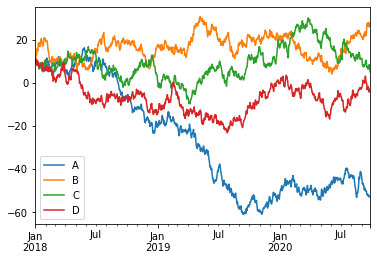

In [8]:
TimeSeriesData.plot()

*Note: we will continue using pandas for visualisation throughout the course. A great resource is the pandas documentation section on [visualisation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html), which explains how to use the many different types of plotting in pandas.*

### Exercise

Open up a sample data file, such as the 'countries.csv' example from a previous video. Think about what might be interesting to plot from this data, and try making at least 3 different plot types. 